In [88]:
from emnist import list_datasets
from emnist import extract_test_samples
from emnist import extract_training_samples

list_datasets()


['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [149]:
y_labels = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F',
'G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','X','Y','Z','a',
'b','d','e','f','g','h','n','q','r','t']
len(y_labels)

46

In [89]:
# Imports
##################################################

import numpy as np
import os
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array, load_img

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [90]:
x_train,y_train = extract_training_samples('balanced')
x_test,y_test = extract_test_samples('balanced')

In [150]:
t= np.unique(y_train)
print(len(t))

47


In [131]:
digits = labels[0:10]
upper_case = labels[10:36]
lower_case = labels[36:len(labels)]

In [134]:
len(lower_case)

11

In [136]:
idx_digits = []
for d in digits:
    t = [index for index,value in enumerate(y_train) if value == d]
    temp = t[0]
    idx_digits.append(temp)

idx_upper_case = []
for d in upper_case:
    t = [index for index,value in enumerate(y_train) if value == d]
    temp = t[0]
    idx_upper_case.append(temp)

idx_lower_case = []
for d in lower_case:
    t = [index for index,value in enumerate(y_train) if value == d]
    temp = t[0]
    idx_lower_case.append(temp)


In [137]:
len(idx_lower_case)

11

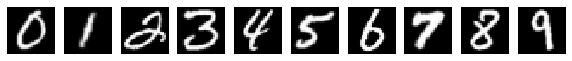

In [147]:
nrows = 1
ncols = 10
fig = plt.gcf()
fig.set_size_inches(ncols*1,nrows*1)
p=0
for idx in idx_digits:
    sp = plt.subplot(nrows,ncols,p+1)
    sp.axis('Off')
    plt.imshow(x_train[idx],cmap='gray')
    p+=1
plt.show()


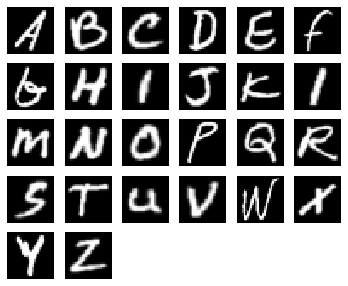

In [141]:
nrows = 5
ncols = 6
fig = plt.gcf()
fig.set_size_inches(ncols*1,nrows*1)
p=0
for idx in idx_upper_case:
    sp = plt.subplot(nrows,ncols,p+1)
    sp.axis('Off')
    plt.imshow(x_train[idx],cmap='gray')
    p+=1
plt.show()

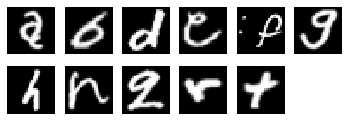

In [142]:
nrows = 2
ncols = 6
fig = plt.gcf()
fig.set_size_inches(ncols*1,nrows*1)
p=0
for idx in idx_lower_case:
    sp = plt.subplot(nrows,ncols,p+1)
    sp.axis('Off')
    plt.imshow(x_train[idx],cmap='gray')
    p+=1
plt.show()

## Visualization of images

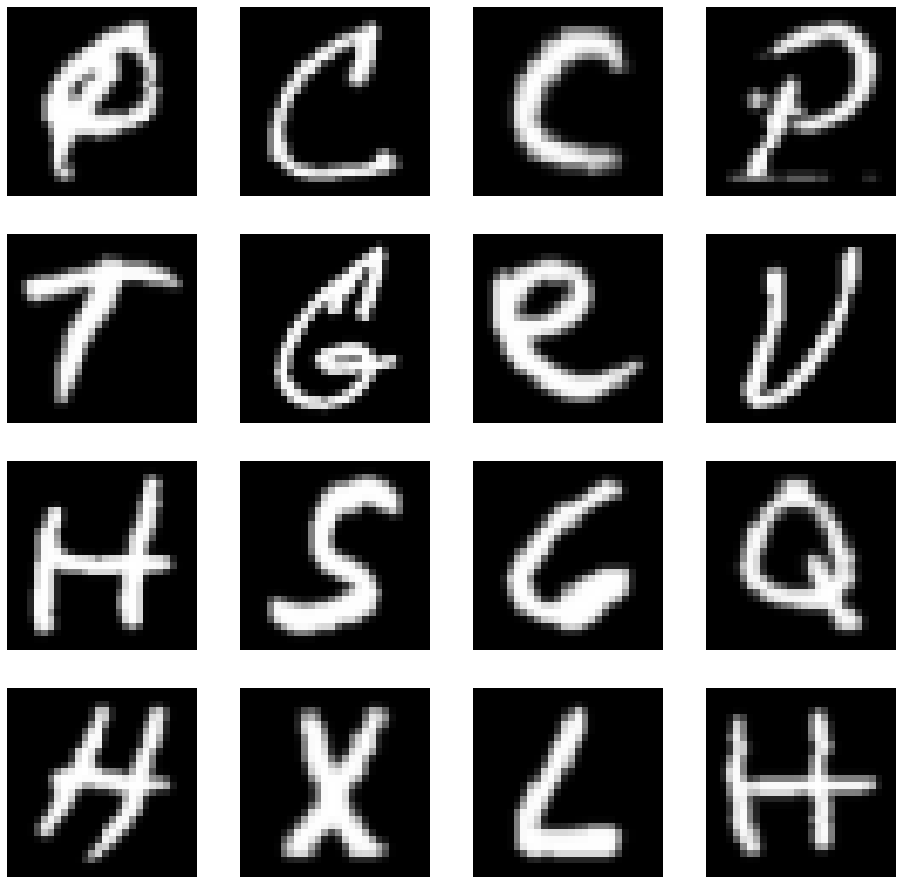

In [84]:
## visualize some training images
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)

n_imgs = nrows*ncols
for i in range(n_imgs):
    sp = plt.subplot(nrows,ncols,i+1)
    sp.axis('Off')
    plt.imshow(x_train[i+random.randint(1,100)],cmap='gray')
plt.show()

In [38]:
num_labels= len(np.unique(y_train))
print(num_labels)

47


In [30]:
x_train.shape

(112800, 28, 28)

In [5]:
## Hyperparameters
batch = 32
EPOCHS = 20
learning_rate= 0.01
momentum = 0.9

In [69]:
# Define a callback function in order to interrupt model evaluation when specified metric does not improve
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [32]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train, test_size=0.2, random_state=42)

In [33]:
## Lets create x train and x valid as flatten images
num_train = x_train.shape[0]
num_valid = x_valid.shape[0]
num_test = x_test.shape[0]
x_train_1d = x_train.reshape(num_train,784)
x_valid_1d = x_valid.reshape(num_valid,784)

# Model Implementation

# Implementation of our 1D data models


In [9]:
# Random Forest
# We left most of the RF model as stock other than specifying the criterion,depth and verbose output

rf = RandomForestClassifier(criterion='gini', max_depth=80, verbose=1)
rf.fit(x_train_1d, y_train)


# Random Forest predictions and table of results
# Here we run predictions on the validation set and output a classification report

y_pred_forest = rf.predict(x_valid_1d)

print('Random Forest Metrics')
print(metrics.classification_report(y_valid, y_pred_forest))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Random Forest Metrics
              precision    recall  f1-score   support

           0       0.58      0.67      0.62       457
           1       0.53      0.69      0.60       472
           2       0.86      0.78      0.82       479
           3       0.91      0.90      0.91       515
           4       0.82      0.87      0.84       460
           5       0.82      0.81      0.82       473
           6       0.83      0.87      0.85       484
           7       0.90      0.95      0.92       447
           8       0.79      0.79      0.79       496
           9       0.64      0.80      0.71       480
          10       0.78      0.90      0.84       494
          11       0.82      0.80      0.81       465
          12       0.88      0.89      0.89

## Neural networks approach

In [10]:
## Function used to evaluate the model implementing k fold cross validation 

def evaluate_model(dataX, dataY, model,n_folds):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        #model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # append scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [11]:
# Function used to plot diagnostic learning curves when using k fold cross validation
def k_fold_summarize_diagnostics(histories):
    for i in range(len(histories)):
        fig, axs = plt.subplots(1,2, figsize = [19,5])
        axs[0].set_title('Cross Entropy Loss')
        axs[0].plot(histories[i].history['loss'], color='blue', label='train')
        axs[0].plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
    
        axs[1].set_title('Classification Accuracy')
        axs[1].plot(histories[i].history['accuracy'], color='blue', label='train')
        axs[1].plot(histories[i].history['val_accuracy'], color='orange', label='test')
        _ = axs[1].legend(['Training', 'Validation'], loc='upper left')

In [78]:
# Function used to plot diagnostic learning curves

def summarize_diagnostics(histories,model_name):
    acc = histories.history['acc']
    val_acc = histories.history['val_acc']
    temp_epoch = len(acc)

    loss = histories.history['loss']
    val_loss = histories.history['val_loss']


    fig, axs = plt.subplots(2,1, figsize = [10,10])
    fig.suptitle(model_name)
    axs[0].plot(range(temp_epoch),loss,lw=3,label='Training loss')
    axs[0].plot(range(temp_epoch),val_loss,lw=3,label='Validation loss')
    axs[0].grid()
    axs[0].set_ylabel('Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_title('Cross Entropy Loss')
    _ = axs[0].legend(['Training', 'Validation'], loc='upper right')

    axs[1].plot(range(temp_epoch),acc,lw=3,label='Training Accuracy')
    axs[1].plot(range(temp_epoch),val_acc,lw=3,label='Validation Accuracy')
    axs[1].grid()
    axs[1].set_ylabel('Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_title('Classification Accuracy',)
    _ = axs[1].legend(['Training', 'Validation'], loc='upper left')
    

In [13]:
def eval_correct(predicted_values,true_labels):
    corr = 0
    for i in range(len(true_labels)):
        if predicted_values[i]==true_labels[i]:
            corr+=1
    print('Correct predictions:',corr)
    print('Incorrect predictions',len(true_labels)-corr)
    print('Predictions accuracy:',corr/len(true_labels))

## CNN Models building

In [39]:
model_cnn_1 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dense(num_labels,activation='softmax')])

In [40]:
model_cnn_2 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(num_labels,activation='softmax')])

In [64]:
model_cnn_3 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.GaussianNoise(0.1),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.GaussianNoise(0.1),
                                    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(num_labels,activation='softmax')])

In [41]:
model_cnn_4 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.GaussianNoise(0.1),
                                    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.GaussianNoise(0.1),
                                    tf.keras.layers.Conv2D(256,(3,3),padding='same',activation='relu'),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(num_labels,activation='softmax')])

## Compile models

In [66]:
#Compile the models using adam optimizers, categorical crossentropy since it is a multiclass label 
#problem
model_cnn_1.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])


model_cnn_2.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])


model_cnn_3.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])


model_cnn_4.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [43]:
#How many and which activation functions we are planning to test
activations = {'relu':tf.nn.relu,'tanh':tf.nn.tanh,'sigmoid':tf.nn.sigmoid}

In [44]:
x_train_2d = x_train.reshape(num_train,28,28,1)
x_valid_2d = x_valid.reshape(num_valid,28,28,1)
x_test_2d  = x_test.reshape(num_test,28,28,1)

In [45]:
history_cnn_1 = model_cnn_1.fit(
    x_train_2d,
    y_train,
    epochs=EPOCHS,
    batch_size=batch,
    validation_data = (x_valid_2d,y_valid),
    callbacks=[callback]
    )


Train on 90240 samples, validate on 22560 samples
Epoch 1/20
90240/90240 [==============================] - 91s 1ms/sample - loss: 1.7945 - acc: 0.5531 - val_loss: 0.7263 - val_acc: 0.7717
Epoch 2/20
90240/90240 [==============================] - 95s 1ms/sample - loss: 0.6448 - acc: 0.7916 - val_loss: 0.6552 - val_acc: 0.7949
Epoch 3/20
90240/90240 [==============================] - 97s 1ms/sample - loss: 0.5459 - acc: 0.8188 - val_loss: 0.6201 - val_acc: 0.8063
Epoch 4/20
90240/90240 [==============================] - 94s 1ms/sample - loss: 0.4913 - acc: 0.8315 - val_loss: 0.6002 - val_acc: 0.8160
Epoch 5/20
90240/90240 [==============================] - 93s 1ms/sample - loss: 0.4492 - acc: 0.8451 - val_loss: 0.6216 - val_acc: 0.8130
Epoch 6/20
90240/90240 [==============================] - 97s 1ms/sample - loss: 0.4137 - acc: 0.8556 - val_loss: 0.6470 - val_acc: 0.8099


In [47]:
# First Simple CNN Prediction and Output Report

y_pred_cnn_1 = model_cnn_1.predict_classes(x_valid_2d)

print('\nSimple CNN metrics')
print(metrics.classification_report(y_pred_cnn_1,y_valid))


Simple CNN metrics
              precision    recall  f1-score   support

           0       0.35      0.67      0.46       239
           1       0.66      0.54      0.60       576
           2       0.83      0.82      0.83       486
           3       0.91      0.95      0.93       498
           4       0.86      0.88      0.87       448
           5       0.81      0.83      0.82       464
           6       0.89      0.78      0.83       550
           7       0.90      0.94      0.92       431
           8       0.78      0.85      0.82       455
           9       0.71      0.69      0.70       495
          10       0.87      0.87      0.87       490
          11       0.91      0.82      0.86       519
          12       0.91      0.81      0.86       527
          13       0.88      0.86      0.87       511
          14       0.90      0.93      0.92       450
          15       0.74      0.53      0.62       654
          16       0.83      0.89      0.86       445
       

In [48]:
eval_correct(y_pred_cnn_1,y_valid)

Correct predictions: 18271
Incorrect predictions 4289
Predictions accuracy: 0.8098847517730496


## CNN Model 2

In [49]:
history_cnn_2 = model_cnn_2.fit(
    x_train_2d,
    y_train,
    epochs=EPOCHS,
    batch_size=batch,
    validation_data = (x_valid_2d,y_valid)
    callbacks=[callback]
    )

Train on 90240 samples, validate on 22560 samples
Epoch 1/20
90240/90240 [==============================] - 123s 1ms/sample - loss: 1.9769 - acc: 0.4684 - val_loss: 0.5670 - val_acc: 0.8096
Epoch 2/20
90240/90240 [==============================] - 95s 1ms/sample - loss: 0.7510 - acc: 0.7576 - val_loss: 0.4370 - val_acc: 0.8498
Epoch 3/20
90240/90240 [==============================] - 97s 1ms/sample - loss: 0.6463 - acc: 0.7884 - val_loss: 0.4206 - val_acc: 0.8526
Epoch 4/20
90240/90240 [==============================] - 99s 1ms/sample - loss: 0.6092 - acc: 0.7986 - val_loss: 0.3974 - val_acc: 0.8551
Epoch 5/20
90240/90240 [==============================] - 174s 2ms/sample - loss: 0.5780 - acc: 0.8076 - val_loss: 0.4040 - val_acc: 0.8548
Epoch 6/20
90240/90240 [==============================] - 39580s 439ms/sample - loss: 0.5611 - acc: 0.8122 - val_loss: 0.3826 - val_acc: 0.8633
Epoch 7/20
90240/90240 [==============================] - 100s 1ms/sample - loss: 0.5494 - acc: 0.8185 - val_

In [51]:
y_pred_cnn_2 = model_cnn_1.predict_classes(x_valid_2d)

print('\nSimple CNN_2 metrics')

print(metrics.classification_report(y_pred_cnn_2,y_valid))


Simple CNN_2 metrics
              precision    recall  f1-score   support

           0       0.35      0.67      0.46       239
           1       0.66      0.54      0.60       576
           2       0.83      0.82      0.83       486
           3       0.91      0.95      0.93       498
           4       0.86      0.88      0.87       448
           5       0.81      0.83      0.82       464
           6       0.89      0.78      0.83       550
           7       0.90      0.94      0.92       431
           8       0.78      0.85      0.82       455
           9       0.71      0.69      0.70       495
          10       0.87      0.87      0.87       490
          11       0.91      0.82      0.86       519
          12       0.91      0.81      0.86       527
          13       0.88      0.86      0.87       511
          14       0.90      0.93      0.92       450
          15       0.74      0.53      0.62       654
          16       0.83      0.89      0.86       445
     

## CNN Model 3

In [71]:
history_cnn_3 = model_cnn_3.fit(
    x_train_2d,
    y_train,
    epochs=EPOCHS,
    batch_size=batch,
    validation_data = (x_valid_2d,y_valid),
    callbacks=[callback]
    )

Train on 90240 samples, validate on 22560 samples
Epoch 1/20
90240/90240 [==============================] - 332s 4ms/sample - loss: 0.8317 - acc: 0.7361 - val_loss: 0.4423 - val_acc: 0.8434
Epoch 2/20
90240/90240 [==============================] - 350s 4ms/sample - loss: 0.5848 - acc: 0.8038 - val_loss: 0.4147 - val_acc: 0.8520
Epoch 3/20
90240/90240 [==============================] - 337s 4ms/sample - loss: 0.5337 - acc: 0.8183 - val_loss: 0.3867 - val_acc: 0.8633
Epoch 4/20
90240/90240 [==============================] - 323s 4ms/sample - loss: 0.4981 - acc: 0.8288 - val_loss: 0.3729 - val_acc: 0.8678
Epoch 5/20
90240/90240 [==============================] - 321s 4ms/sample - loss: 0.4675 - acc: 0.8373 - val_loss: 0.3488 - val_acc: 0.8752
Epoch 6/20
90240/90240 [==============================] - 316s 3ms/sample - loss: 0.4501 - acc: 0.8439 - val_loss: 0.3454 - val_acc: 0.8787
Epoch 7/20
90240/90240 [==============================] - 321s 4ms/sample - loss: 0.4388 - acc: 0.8461 - val_l

In [72]:
y_pred_cnn_3 = model_cnn_3.predict_classes(x_valid_2d)

print('\nSimple CNN_3 metrics')

print(metrics.classification_report(y_pred_cnn_3,y_valid))


Simple CNN_3 metrics
              precision    recall  f1-score   support

           0       0.47      0.69      0.56       315
           1       0.94      0.45      0.61       981
           2       0.84      0.92      0.88       435
           3       0.97      0.98      0.98       512
           4       0.93      0.93      0.93       458
           5       0.89      0.91      0.90       465
           6       0.94      0.91      0.93       501
           7       0.98      0.95      0.97       461
           8       0.93      0.93      0.93       496
           9       0.92      0.64      0.75       689
          10       0.97      0.94      0.95       508
          11       0.95      0.97      0.96       460
          12       0.95      0.96      0.95       466
          13       0.91      0.96      0.94       475
          14       0.97      0.99      0.98       459
          15       0.60      0.67      0.63       415
          16       0.92      0.97      0.94       455
     

## Visualization of intermediate steps of final CNN Model 4

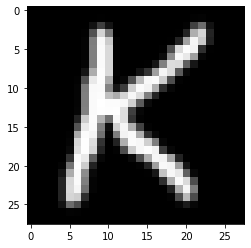

In [73]:
in_im = x_train[6]
test_im = x_train[6].reshape((28,28))
plt.imshow(test_im,cmap='gray')
plt.show()

In [74]:
ev_image= test_im.reshape((1,) + test_im.shape) 
ev_image = ev_image.reshape(1,28,28,1)

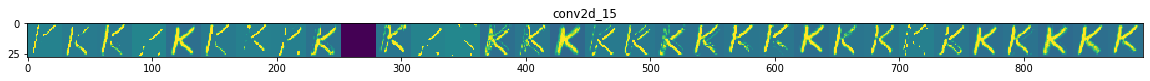

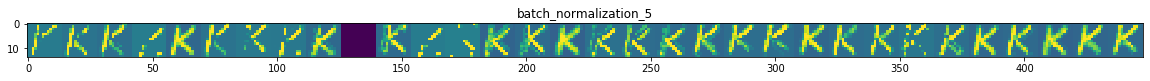

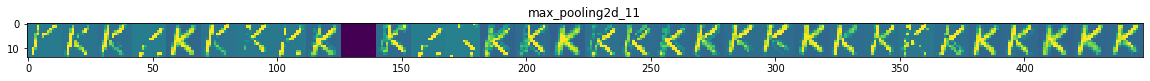

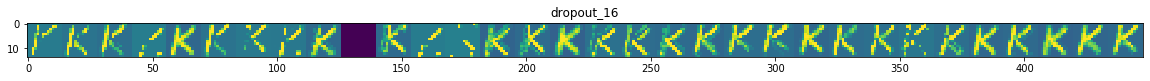

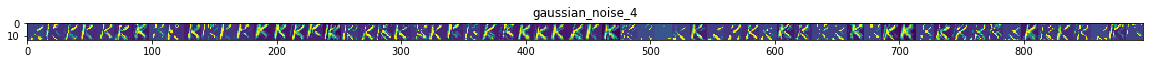

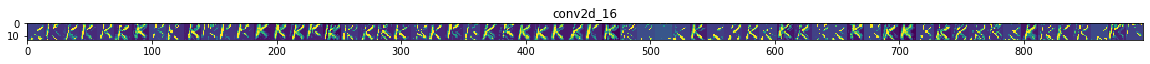

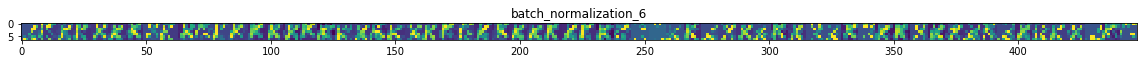

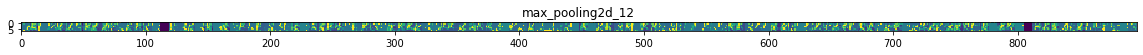

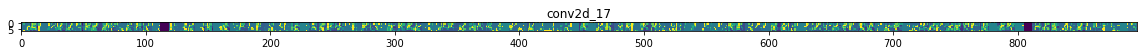

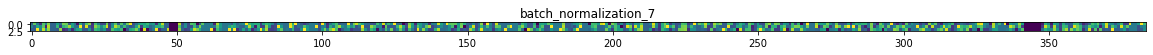

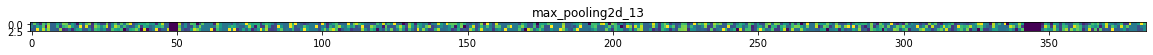

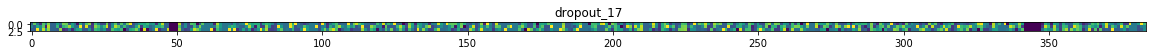

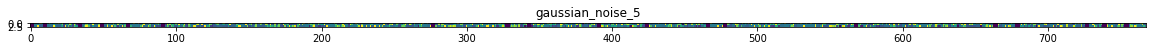

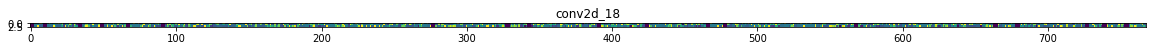

In [75]:
successive_outputs = [layer.output for layer in model_cnn_4.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model_cnn_4.input, outputs = successive_outputs)
#x   = img_to_array(ev_image)
successive_feature_maps = visualization_model.predict(ev_image)
# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model_cnn_4.layers]
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
        x  = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std ()
        x *=  64
        x += 128
        x  = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [76]:
history_cnn_4 = model_cnn_4.fit(
    x_train_2d,
    y_train,
    epochs=EPOCHS,
    batch_size=batch,
    validation_data = (x_valid_2d,y_valid)
    )

Train on 90240 samples, validate on 22560 samples
Epoch 1/20
90240/90240 [==============================] - 613s 7ms/sample - loss: 0.9503 - acc: 0.7105 - val_loss: 0.4505 - val_acc: 0.8408
Epoch 2/20
90240/90240 [==============================] - 626s 7ms/sample - loss: 0.5445 - acc: 0.8203 - val_loss: 0.3966 - val_acc: 0.8598
Epoch 3/20
90240/90240 [==============================] - 629s 7ms/sample - loss: 0.4952 - acc: 0.8329 - val_loss: 0.3703 - val_acc: 0.8675
Epoch 4/20
90240/90240 [==============================] - 650s 7ms/sample - loss: 0.4625 - acc: 0.8433 - val_loss: 0.3597 - val_acc: 0.8740
Epoch 5/20
90240/90240 [==============================] - 613s 7ms/sample - loss: 0.4375 - acc: 0.8505 - val_loss: 0.3517 - val_acc: 0.8669
Epoch 6/20
90240/90240 [==============================] - 620s 7ms/sample - loss: 0.4166 - acc: 0.8551 - val_loss: 0.3545 - val_acc: 0.8743
Epoch 7/20
90240/90240 [==============================] - 596s 7ms/sample - loss: 0.4037 - acc: 0.8588 - val_l

Convolutional Neural Network_4
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       509
           1       0.79      0.50      0.61       746
           2       0.89      0.91      0.90       467
           3       0.98      0.98      0.98       515
           4       0.95      0.93      0.94       469
           5       0.91      0.95      0.93       455
           6       0.96      0.90      0.93       517
           7       0.99      0.94      0.97       473
           8       0.94      0.94      0.94       497
           9       0.93      0.67      0.78       668
          10       0.99      0.95      0.97       515
          11       0.97      0.97      0.97       467
          12       0.99      0.95      0.97       484
          13       0.92      0.96      0.94       477
          14       0.98      0.98      0.98       466
          15       0.55      0.71      0.62       359
          16       0.93      0.96      0.95       

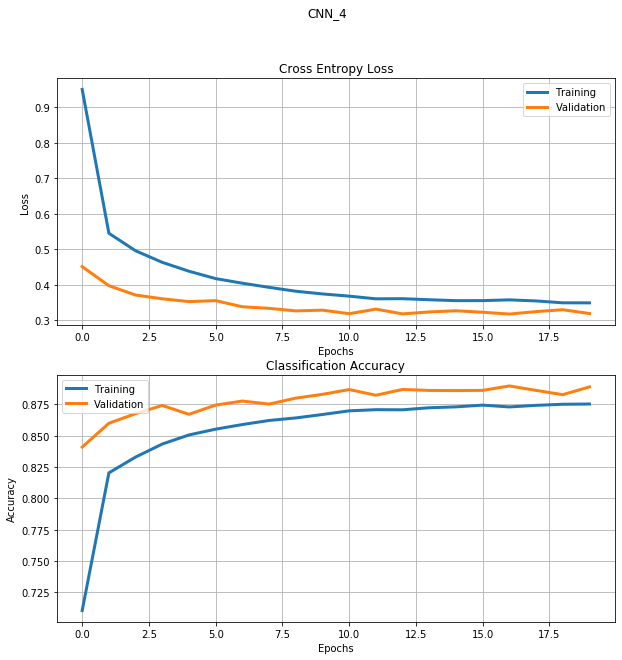

In [79]:
y_pred_cnn_4 = model_cnn_4.predict_classes(x_valid_2d)
print('Convolutional Neural Network_4')
print(metrics.classification_report(y_pred_cnn_4,y_valid))

eval_correct(y_pred_cnn_4,y_valid)

summarize_diagnostics(history_cnn_4,'CNN_4')

## Confusion matrix

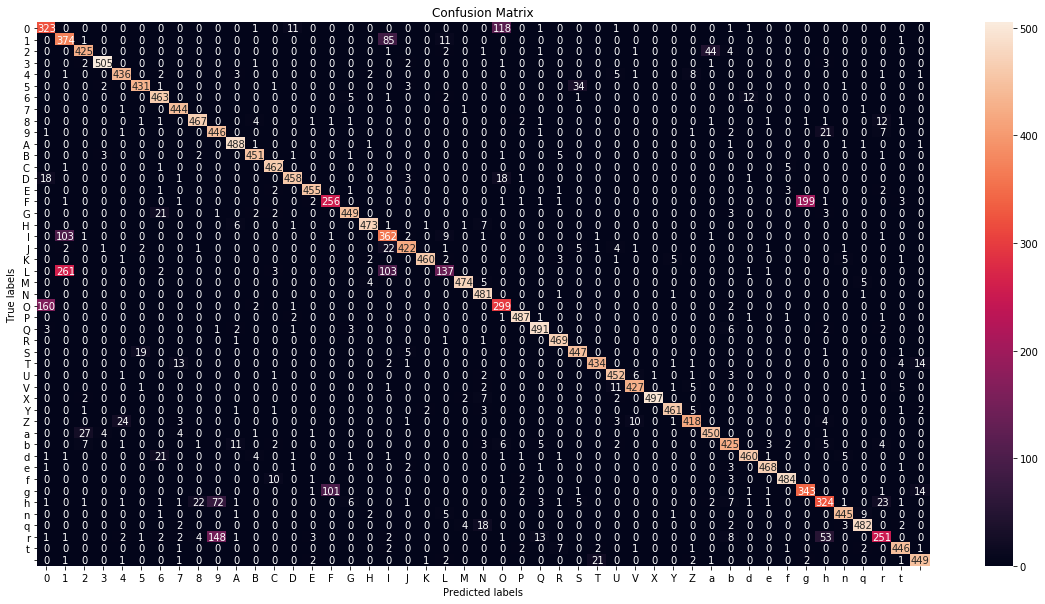

In [151]:
cnn_cm = metrics.confusion_matrix(y_valid,y_pred_cnn_4)
f, ax= plt.subplots(figsize=(20,10))

sns.heatmap(cnn_cm, annot=True, ax = ax,fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(y_labels); ax.yaxis.set_ticklabels(y_labels);

In [152]:
def eval_correct(predicted_values,true_labels):
    corr = 0
    for i in range(len(true_labels)):
        if predicted_values[i]==true_labels[i]:
            corr+=1
    print('Correct predictions:',corr)
    print('Incorrect predictions',len(true_labels)-corr)
    print('Predictions accuracy:',corr/len(true_labels))

In [153]:
eval_correct(y_pred_cnn_4,y_valid)

Correct predictions: 20051
Incorrect predictions 2509
Predictions accuracy: 0.8887854609929078
